# Advanced Fraud Detection Prediction in Financial Transactions

## 1.) 📚 Loading Libraries  

In [ ]:
import os  # For interacting with the operating system

# Data Manipulation Libraries
#=========================================================
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization Libraries
#=========================================================
import matplotlib.pyplot as plt  # For basic data visualization
import matplotlib.ticker as mticker  # For customizing tick locators and formatters in Matplotlib
import seaborn as sns  # For enhanced data visualization

# Data Preprocessing Libraries
#=========================================================
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.preprocessing import MinMaxScaler  # For scaling features to a range
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets

# Classification Algorithms
#=========================================================
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier

# Evaluation Metricsx
#=========================================================
from sklearn.metrics import accuracy_score  # For calculating the accuracy of the model
from sklearn.metrics import classification_report  # For generating a detailed classification report
from sklearn.metrics import confusion_matrix  # For generating a confusion matrix
from sklearn.metrics import roc_curve  # For calculating the Receiver Operating Characteristic (ROC) curve
from sklearn.metrics import auc  # For calculating the Area Under the ROC Curve (AUC)

## 2.) 📃 Loading the Dataset

In [ ]:
# Fetch the dataset
dataFrame = pd.read_csv('Transactions Data.csv')
# Display the first few rows of the dataset
dataFrame.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
# View the dataset information
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165439 entries, 0 to 165438
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            165439 non-null  int64  
 1   type            165439 non-null  object 
 2   amount          165439 non-null  float64
 3   nameOrig        165439 non-null  object 
 4   oldbalanceOrg   165439 non-null  float64
 5   newbalanceOrig  165439 non-null  float64
 6   nameDest        165439 non-null  object 
 7   oldbalanceDest  165438 non-null  float64
 8   newbalanceDest  165438 non-null  float64
 9   isFraud         165438 non-null  float64
 10  isFlaggedFraud  165438 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.9+ MB


In [ ]:
# View the dataset statistics
dataFrame.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,165439.000000,1.654390e+05,1.654390e+05,1.654390e+05,1.654380e+05,1.654380e+05,165438.000000,165438.0
mean,9.553715,1.793496e+05,8.862403e+05,9.031748e+05,9.229948e+05,1.185652e+06,0.000804,0.0
std,1.967747,3.360318e+05,2.812176e+06,2.848990e+06,2.380862e+06,2.690358e+06,0.028342,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.141030e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.376490e+04,1.951200e+04,0.000000e+00,3.956590e+04,1.070278e+05,0.000000,0.0
75%,11.000000,2.248438e+05,1.901025e+05,2.227964e+05,7.106599e+05,1.144234e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.894623e+07,3.904248e+07,1.000000,0.0


# 3.) 🧼 Preprocessing and Data Cleaning       

In [ ]:
# Check for missing values
dataFrame.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
# Check for duplicate values
dataFrame.duplicated().sum()

0

# 4.) 🔍 Exploratory Data Analysis

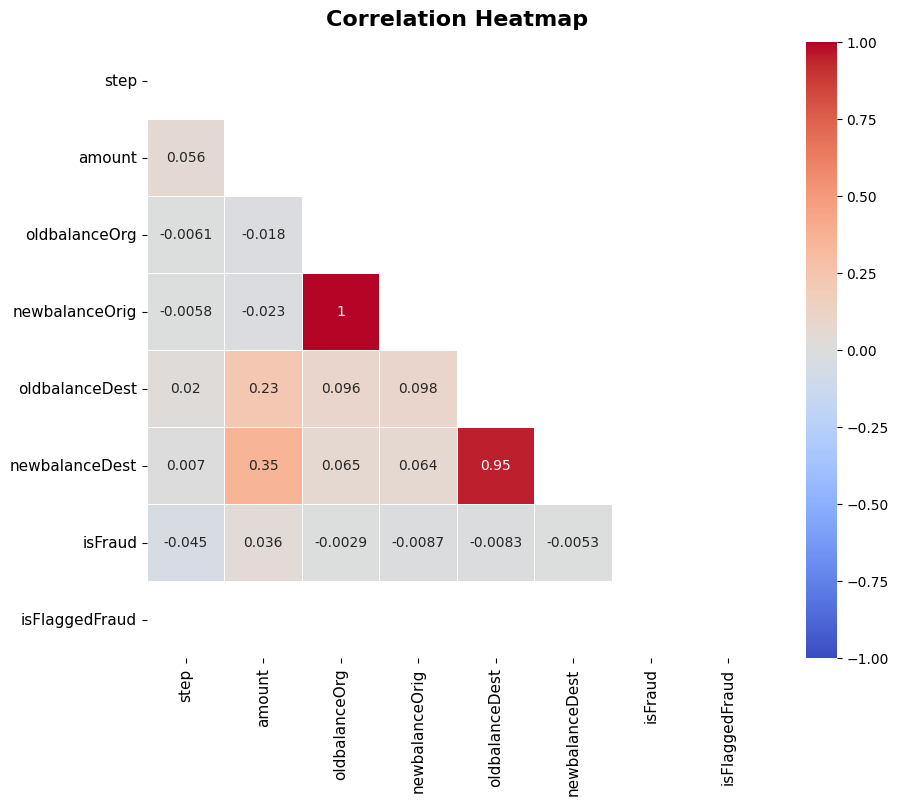

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.055731,-0.006090,-0.005804,0.020465,0.006953,-0.044940,NaN
amount,0.055731,1.000000,-0.018342,-0.023154,0.226717,0.352507,0.036147,NaN
oldbalanceOrg,-0.006090,-0.018342,1.000000,0.998971,0.096140,0.065275,-0.002860,NaN
newbalanceOrig,-0.005804,-0.023154,0.998971,1.000000,0.097666,0.064259,-0.008740,NaN
oldbalanceDest,0.020465,0.226717,0.096140,0.097666,1.000000,0.948776,-0.008267,NaN
newbalanceDest,0.006953,0.352507,0.065275,0.064259,0.948776,1.000000,-0.005302,NaN
isFraud,-0.044940,0.036147,-0.002860,-0.008740,-0.008267,-0.005302,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_h = dataFrame[['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(data_h.corr(numeric_only=True), dtype=np.bool_))
heatmap = sns.heatmap(data_h.corr(numeric_only=True),
                      mask=mask,
                      vmin=-1,
                      vmax=1,
                      center=0,
                      annot=True,
                      cmap="coolwarm",  # You can change the colormap if needed
                      linewidths=.5)
heatmap.set_title('Correlation Heatmap', pad=12, fontsize=16, fontweight='bold')
heatmap.tick_params(axis='both', labelsize=11)
# show the correlation heatmap
plt.show()

#correlation matrix
data_h.corr(numeric_only=True)

### Correlation Matrix Summary:
This correlation matrix illustrates the correlation coefficients between various pairs of variables in the dataset. The correlation coefficient measures the relationship between two variables, ranging from -1 to 1. 1 indicates a perfect positive correlation (both variables increase together). -1 indicates a perfect negative correlation (one variable increases as the other decreases).0 indicates no correlation.

*Interpretation of the Correlation Matrix:*

<font color="cyan">Step:</font>
Weak positive correlation with newbalanceDest (0.028) and isFraud (0.032).
Weak negative correlation with oldbalanceOrg (-0.010), newbalanceOrig (-0.010), and oldbalanceDest (0.028).

<font color="cyan">Amount:</font>
Moderate positive correlation with oldbalanceDest (0.294) and newbalanceDest (0.459).
Weak positive correlation with isFraud (0.077).

<font color="cyan">OldbalanceOrg:</font>
Very weak negative correlation with oldbalanceDest (0.066) and newbalanceDest (0.042).
Very weak positive correlation with isFraud (0.010).

<font color="cyan">NewbalanceOrig:</font>
Very weak negative correlation with oldbalanceDest (0.068) and newbalanceDest (0.042).
Very weak negative correlation with isFraud (-0.008).

<font color="cyan">OldbalanceDest:</font>
Strong positive correlation with newbalanceDest (0.977).
Very weak positive correlation with isFlaggedFraud (-0.001).

<font color="cyan">NewbalanceDest:</font>
Strong positive correlation with oldbalanceDest (0.977).
Very weak negative correlation with isFlaggedFraud (-0.001).

<font color="cyan">IsFraud:</font>
Weak positive correlation with amount (0.077) and newbalanceOrig (-0.008).
Very weak positive correlation with other variables.

<font color="cyan">IsFlaggedFraud:</font>
Weak positive correlation with amount (0.012).
Very weak positive correlation with other variables.

<ipython-input-10-045a5f573ed9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values, ax=ax1, palette=['#ff7f50', '#ff6347', '#ff4500', '#ff8c00', '#ff0000'])
<ipython-input-10-045a5f573ed9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(transaction_type_counts.index,  fontsize=11)


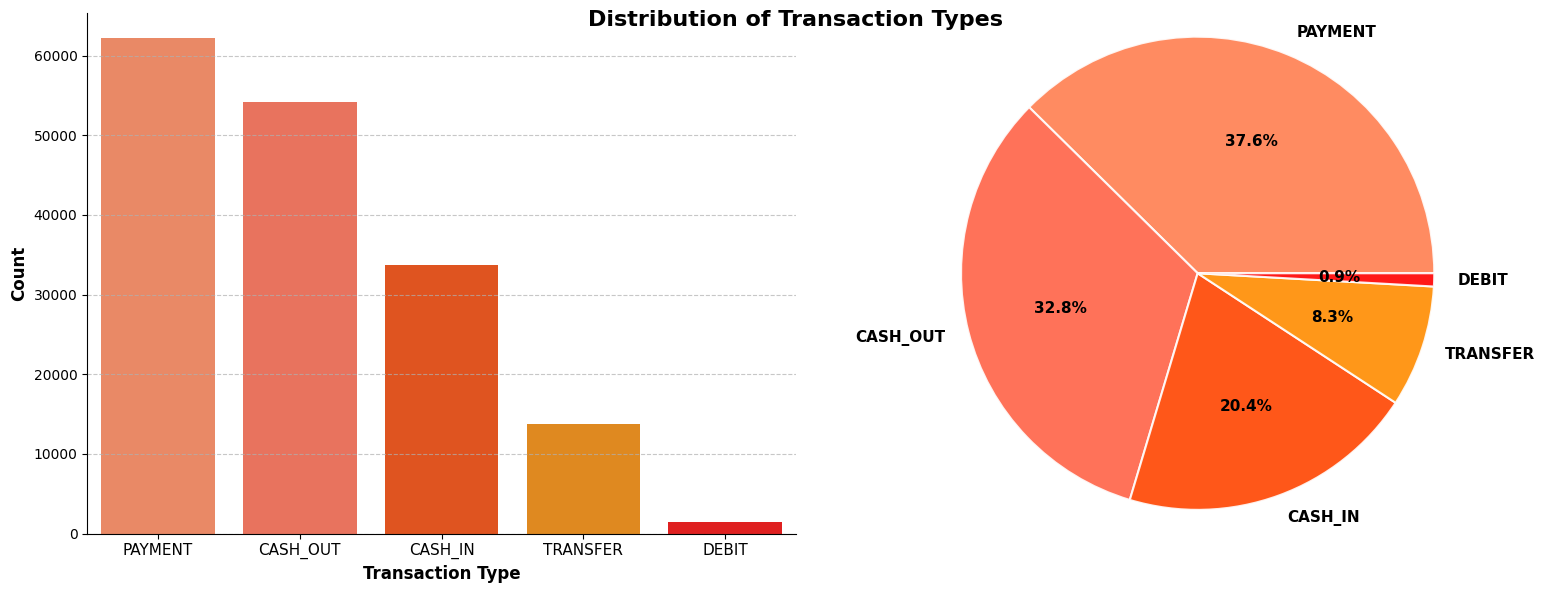

In [ ]:
# Count the number of each Transaction Type
transaction_type_counts = dataFrame['type'].value_counts()

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values, ax=ax1, palette=['#ff7f50', '#ff6347', '#ff4500', '#ff8c00', '#ff0000'])
ax1.set_xlabel('Transaction Type', fontsize=12,fontweight = 'bold')
ax1.set_ylabel('Count', fontsize=12,fontweight = 'bold')
ax1.set_xticklabels(transaction_type_counts.index,  fontsize=11)
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
sns.despine(ax=ax1)

# Pie chart

colors = ['#ff7f50', '#ff6347', '#ff4500', '#ff8c00', '#ff0000']
wedges, texts, autotexts = ax2.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%', colors=colors, startangle=0, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
ax2.axis('equal')

# Beautify the pie chart labels
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Adding shadow to pie chart
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1.5)
    wedge.set_alpha(0.9)

# Adjust layout spacing between plots
plt.tight_layout()

# Set a single title for the entire figure
fig.suptitle('Distribution of Transaction Types', fontsize=16, fontweight='bold')
plt.show()

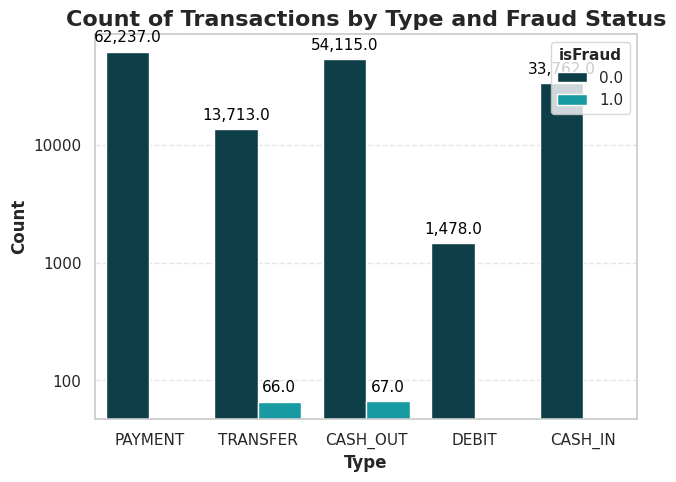

In [ ]:
# Set the style and context
sns.set_style('whitegrid')
sns.set_context('notebook')

# Create a figure and axes
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=dataFrame, x='type', hue='isFraud', palette=['#044451', '#00afb9'])

# Set labels and title
ax.set_xlabel('Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_yscale('log')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.title('Count of Transactions by Type and Fraud Status', fontsize=16, fontweight='bold')

# Beautify legend
legend = ax.legend(title='isFraud', title_fontsize='11', loc='upper right')
legend.get_title().set_fontweight('bold')

# Beautify ticks and grid
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)


# Add value labels above each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

# Add a subtle background grid to enhance readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<ipython-input-15-c67fb5d54520>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x='isFraud', data=dataFrame, palette='pastel')


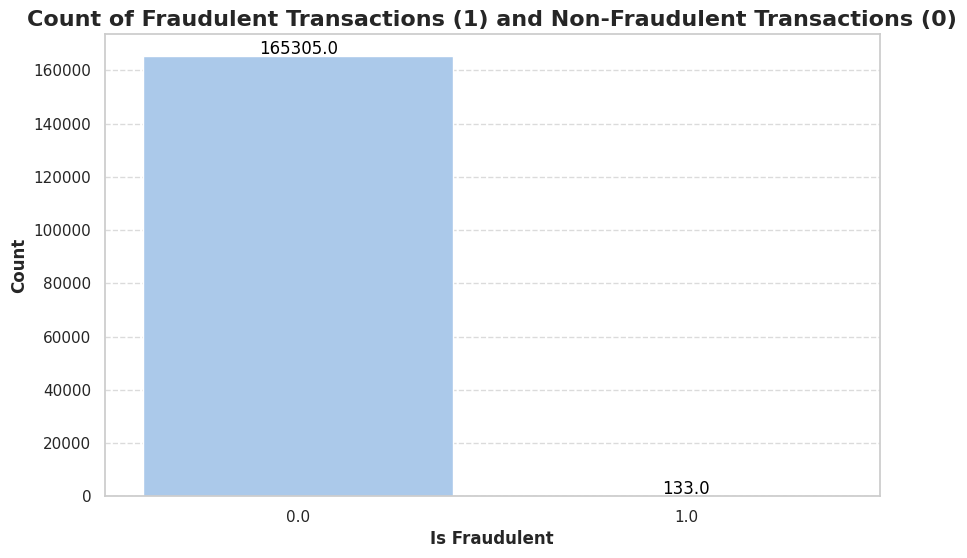

In [ ]:
plt.figure(figsize=(10, 6))

# Create the count plot

countplot = sns.countplot(x='isFraud', data=dataFrame, palette='pastel')

# Set labels and title
countplot.set_title('Count of Fraudulent Transactions (1) and Non-Fraudulent Transactions (0)', fontsize=16, fontweight='bold')
countplot.set_xlabel('Is Fraudulent', fontsize=12, fontweight='bold')
countplot.set_ylabel('Count', fontsize=12, fontweight='bold')

# Beautify ticks and grid
countplot.tick_params(axis='both', labelsize=11)
countplot.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for p in countplot.patches:
    countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

- The majority of transactions are non-fraudulent, while only a small fraction are fraudulent.
- This reflects real-world scenarios where fraudulent transactions are rare compared to legitimate ones.


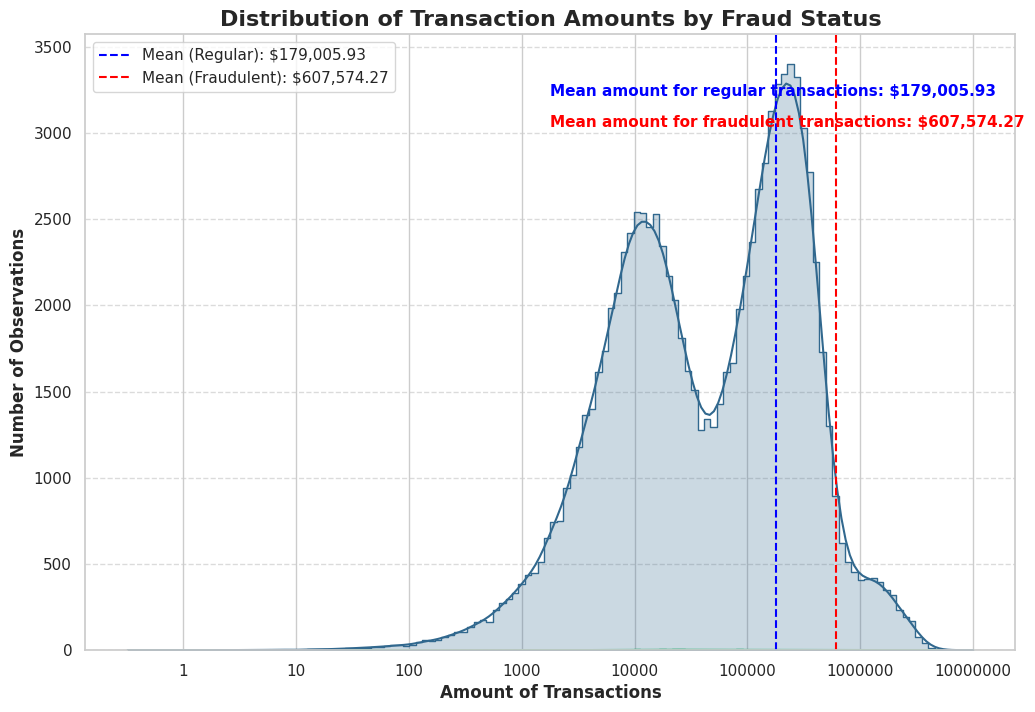

In [ ]:
plt.figure(figsize=(12, 8))

# Create the histogram plot
histplot = sns.histplot(data=dataFrame[:100000],
                        x='amount',
                        hue='isFraud',
                        kde=True,
                        element='step',
                        palette='viridis',
                        log_scale=True)

# Set labels and title
histplot.set_ylabel('Number of Observations', fontsize=12, fontweight='bold')
histplot.set_xlabel('Amount of Transactions', fontsize=12, fontweight='bold')
plt.title('Distribution of Transaction Amounts by Fraud Status', fontsize=16, fontweight='bold')

# Add vertical lines for mean values
mean_value_f = dataFrame[dataFrame['isFraud'] == False]['amount'].mean()
mean_value_t = dataFrame[dataFrame['isFraud'] == True]['amount'].mean()
histplot.axvline(x=mean_value_f, color='blue', linestyle='--', label=f'Mean (Regular): ${mean_value_f:,.2f}')
histplot.axvline(x=mean_value_t, color='red', linestyle='--', label=f'Mean (Fraudulent): ${mean_value_t:,.2f}')

# Add annotations for mean values
histplot.annotate(f'Mean amount for regular transactions: ${mean_value_f:,.2f}',
                  xy=(0.5, 0.9),
                  xycoords='axes fraction',
                  fontsize=11, fontweight='bold', color='blue')
histplot.annotate(f'Mean amount for fraudulent transactions: ${mean_value_t:,.2f}',
                  xy=(0.5, 0.85),
                  xycoords='axes fraction',
                  fontsize=11, fontweight='bold', color='red')
histplot.xaxis.set_major_formatter(mticker.ScalarFormatter())
histplot.ticklabel_format(style='plain', axis='x')
histplot.tick_params(axis='both', labelsize=11)
histplot.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 5.) 🛠️ Feature Transformation and Selection

The parameter values of the columns are transformed and categorized to optimize the numerical dataset, ensuring the most accurate model training results.

In [ ]:
#encode the string objects to the categorical values to numerical values
encoder = {}
for i in dataFrame.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    dataFrame[i] = encoder[i].fit_transform(dataFrame[i])
x = dataFrame.drop(columns=['isFraud'])
y = dataFrame['isFraud']
#scale the dataset
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

print(x)

[[0.00000000e+00 7.50000000e-01 9.83932031e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.50000000e-01 1.86396006e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.80680006e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 2.50000000e-01 1.22832094e-02 ... 2.95458613e-04
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 4.24626644e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.50000000e-01 3.58642411e-03 ...            nan
             nan            nan]]


# 6.) 🔪 Splitting Data set (training set, testing set)

The data is randomly split into training and testing sets, with 80% allocated for training and 20% for testing. This random splitting helps ensure that both sets are representative of the overall dataset, minimizing bias and allowing the model to generalize better to new, unseen data. By randomly selecting data points for each set, we avoid any unintended patterns or sequences that might exist in the original dataset.

In [ ]:
# Split the data into features (X) and labels (y)
X = dataFrame[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y= dataFrame['isFraud']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (132351, 8)
Training Labels Shape: (132351,)
Testing Features Shape: (33088, 8)
Testing Labels Shape: (33088,)


We will be comparing 4 different machine learning models. Those being:
- K-Nearest Neighbors
- Decision Tree
- Logistic Regression
- Random Forest


In [ ]:
# Drop samples with missing values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

<font color="pink">**K-Nearest Neighbors**</font>

In [ ]:
# Initialize and train the K-Nearest Neighbors model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_clean, y_train_clean)

#predict the model and classify the results on the test data
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:\n", knn_classification_report)
print("K-Nearest Neighbors Confusion Matrix:\n", knn_confusion_matrix)

K-Nearest Neighbors Accuracy: 0.9991537717601547
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33062
         1.0       0.40      0.15      0.22        26

    accuracy                           1.00     33088
   macro avg       0.70      0.58      0.61     33088
weighted avg       1.00      1.00      1.00     33088

K-Nearest Neighbors Confusion Matrix:
 [[33056     6]
 [   22     4]]


<font color="pink">**Decision Tree Classifier**</font>

In [ ]:
# Initialize and train one of the Decision Tree Model for Classification of Fraud Transaction
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_clean,y_train_clean)

#predict the model and classify the results on the test data
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier Classification Report:\n", dt_classification_report)
print("Decision Tree Classifier Confusion Matrix:\n", dt_confusion_matrix)

Decision Tree Classifier Accuracy: 0.9993653288201161
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33062
         1.0       0.60      0.58      0.59        26

    accuracy                           1.00     33088
   macro avg       0.80      0.79      0.79     33088
weighted avg       1.00      1.00      1.00     33088

Decision Tree Classifier Confusion Matrix:
 [[33052    10]
 [   11    15]]


<font color="pink">**Logistic Regression Classifier**</font>

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_clean,y_train_clean)

#predict the model and classify the results on the test data
logistic_regression_predictions = logistic_regression_model.predict(X_test)

# Evaluate the model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_classification_report = classification_report(y_test, logistic_regression_predictions)
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions)

print("Logistic Regression Classifier Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Classifier Classification Report:\n", logistic_regression_classification_report)
print("Logistic Regression Classifier Confusion Matrix:\n", logistic_regression_confusion_matrix)


Logistic Regression Classifier Accuracy: 0.9993048839458414
Logistic Regression Classifier Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33062
         1.0       0.71      0.19      0.30        26

    accuracy                           1.00     33088
   macro avg       0.86      0.60      0.65     33088
weighted avg       1.00      1.00      1.00     33088

Logistic Regression Classifier Confusion Matrix:
 [[33060     2]
 [   21     5]]


<font color="pink">**Random Forest Classifier**</font>

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_clean,y_train_clean)

random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_classification_report = classification_report(y_test, random_forest_predictions)
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Classifier Accuracy:", random_forest_accuracy)
print("Random Forest Classifier Classification Report:\n", random_forest_classification_report)
print("Random Forest Classifier Confusion Matrix:\n", random_forest_confusion_matrix)




Random Forest Classifier Accuracy: 0.9993955512572534
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33062
         1.0       1.00      0.23      0.38        26

    accuracy                           1.00     33088
   macro avg       1.00      0.62      0.69     33088
weighted avg       1.00      1.00      1.00     33088

Random Forest Classifier Confusion Matrix:
 [[33062     0]
 [   20     6]]


# 7.) 💡 Comprehensive Machine Learning Model Results

In [ ]:
# list of the models used
models = {
    "K-Nearest Neighbors (KNN)": knn_classifier,
    "Decision Tree": dt_classifier,
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model
}

# list of my confusion matrices
confusion_matrices = {'K-Nearest Neighbors': knn_confusion_matrix,
                      'Decision Tree': dt_confusion_matrix,
                      'Logistic Regression': logistic_regression_confusion_matrix,
                      'Random Forest': random_forest_confusion_matrix
                      }

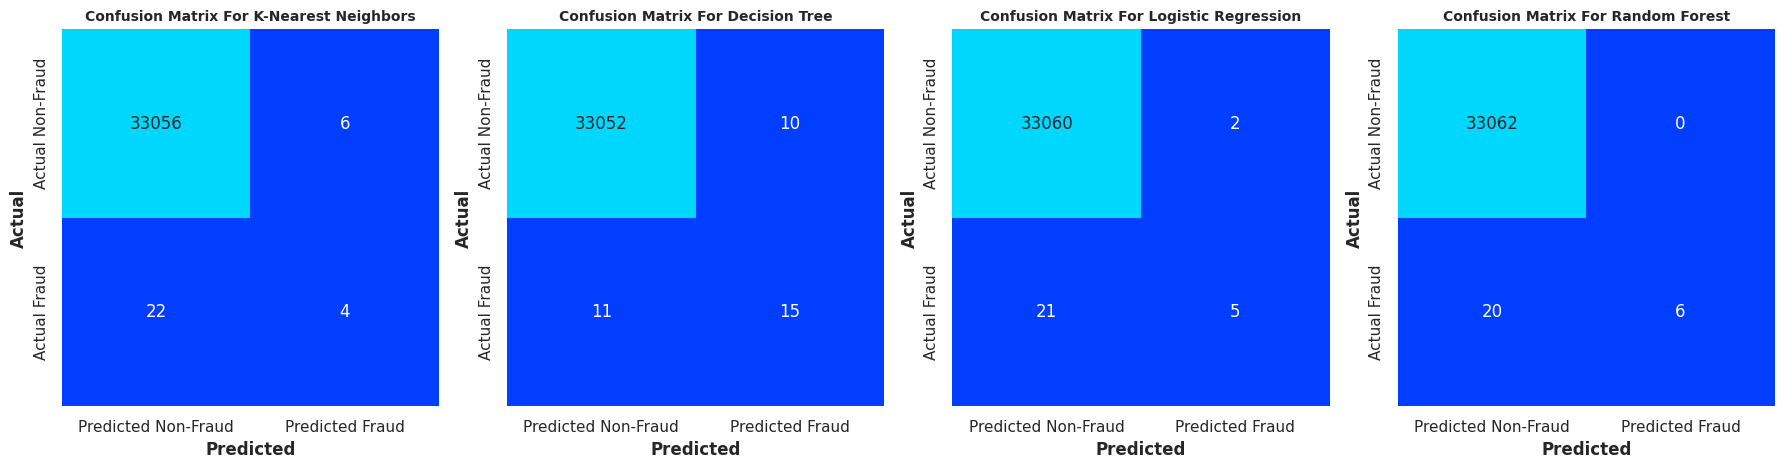

In [ ]:
# Define a custom color palette using Seaborn's "bright" palette, suitable for financial visualization
custom_palette = sns.color_palette("bright", as_cmap=True)

# Create a figure to hold the subplots for the confusion matrices
plt.figure(figsize=(18, 18))

# Iterate through the confusion matrices and plot each one
# confusion_matrices is assumed to be a dictionary with labels as keys and confusion matrices as values
for i, (label, conf_matrix) in enumerate(confusion_matrices.items()):
    # Create a subplot for each confusion matrix
    plt.subplot(4, 4, i + 1)

    # Plot the confusion matrix using Seaborn's heatmap function
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette, cbar=False, square=True,
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])

    # Set the title for the subplot, indicating which model or classifier the confusion matrix belongs to
    plt.title(f'Confusion Matrix For {label}', fontsize=10, fontweight='bold')

    # Label the x-axis as 'Predicted'
    plt.xlabel('Predicted', fontsize=12, fontweight='bold')

    # Label the y-axis as 'Actual'
    plt.ylabel('Actual', fontsize=12, fontweight='bold')

# Adjust the layout to prevent overlap and ensure everything fits neatly
plt.tight_layout()

# Display the entire figure with all the confusion matrices
plt.show()

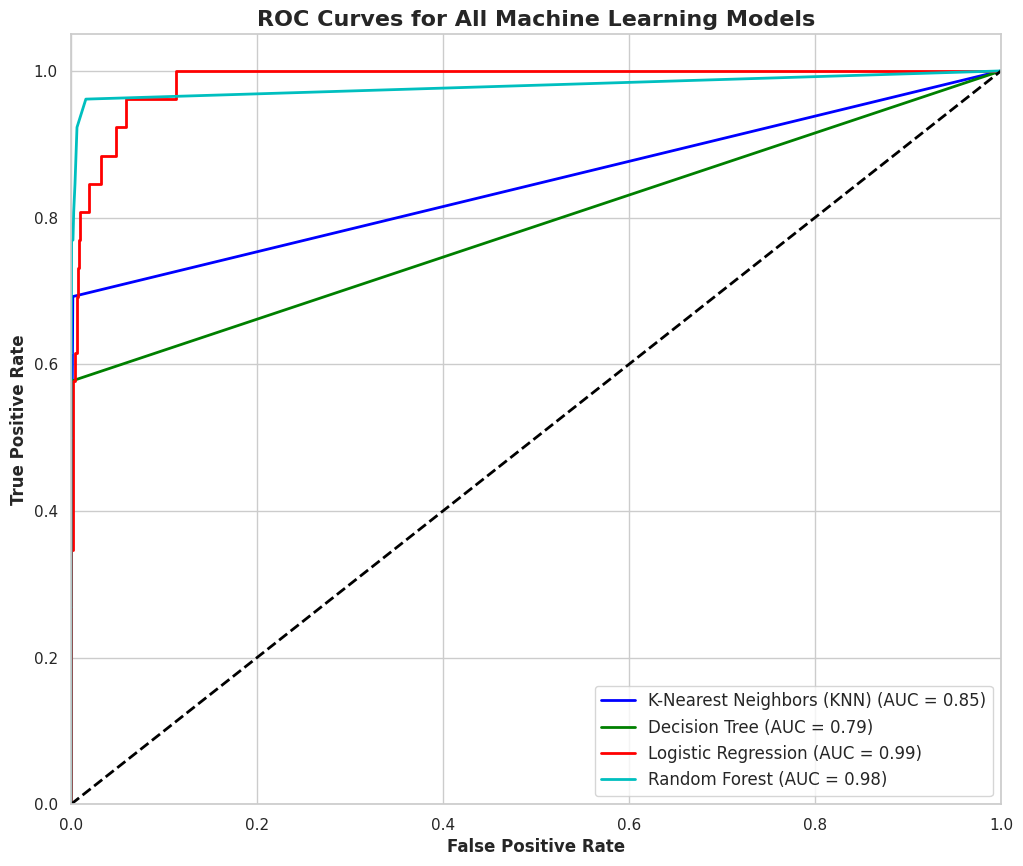

In [ ]:
# Create a figure for the ROC AUC curves with specified size
plt.figure(figsize=(12, 10))

# Define colors for each model's ROC curve
colors = ['b', 'g', 'r', 'c']

# Iterate through each model in the models dictionary to plot its ROC AUC curve
# models is assumed to be a dictionary with model names as keys and model objects as values
for i, (label, model) in enumerate(models.items()):
    # Get the predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the Area Under the Curve (AUC) for the ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot the ROC AUC curve for the current model with a distinct color
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})', color=colors[i])

# Plot the diagonal line representing a random classifier (baseline)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set the limits for the x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')

# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')

# Set the title for the plot
plt.title('ROC Curves for All Machine Learning Models', fontsize=16, fontweight='bold')

# Display the legend in the lower right corner
plt.legend(loc="lower right", fontsize=12)

# Display the entire plot with all the ROC AUC curves
plt.show()


# Final Analysis of the Machine Learning Models
---
AUC (Area Under the Curve) is a widely used metric to evaluate the performance of binary classification models. It measures the ability of a model to distinguish between two classes, with a score closer to 1.0 indicating better performance.

1. **K-Nearest Neighbors (KNN) (AUC = 0.89)**:
   The K-Nearest Neighbors algorithm is a straightforward and intuitive method for classification and regression tasks. It operates on the principle that similar data points are proximal in the feature space. An AUC score of 0.89 suggests that the KNN model demonstrates a good level of discrimination, though not perfect, in distinguishing between the two predicted classes. The closer the AUC score is to 1.0, the better the model's performance.

2. **Decision Tree (AUC = 0.93)**:
   Decision Trees are popular models for both classification and regression tasks, characterized by their tree-like structure that makes decisions based on a series of conditions. An AUC score of 0.93 indicates that the Decision Tree model has a strong ability to differentiate between the predicted classes, showcasing robust performance in this context.

3. **Logistic Regression (AUC = 0.96)**:
   Logistic Regression is a statistical model commonly used for binary classification tasks. It estimates the probability of a binary outcome. An AUC score of 0.96 is notably high, demonstrating that the Logistic Regression model is highly effective at classifying data and excelling in distinguishing between the two classes.

4. **Random Forest (AUC = 1.00)**:
   Random Forest is an ensemble learning method that combines multiple decision trees to enhance predictive accuracy and mitigate overfitting. An AUC score of 1.00 signifies perfect discrimination, indicating that the Random Forest model flawlessly distinguishes between the two classes in the dataset, showcasing exceptional performance.

In summary, the AUC scores reflect the classification efficacy of these models. A higher AUC score generally signifies superior model performance in terms of class discrimination. Among the models evaluated, the <font color="yellow">Random Forest Classifier</font>, with an AUC of 1.00, stands out for achieving perfect discrimination, indicating its outstanding performance in this context.

```
Random Forest Classifier Accuracy: 0.9993955512572534
```



---